# Trains and  tests on parts of  NA12878 data for Del_st, Del_end and No_sv, ground  truth Mills_nanosv

## Load dependences and setting output configuration

In [ ]:
import sys
import os

path = os.getcwd()
path_mcfly = '/hpc/cog_bioinf/ridder/users/lsantuari/Software/Git/mcfly_gtcg'
os.chdir(path_mcfly)

In [ ]:
!{sys.executable} setup.py install
os.chdir(path)

In [ ]:
!echo $PATH

In [ ]:
 !type python

In [ ]:
sys.executable

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
import gzip
import os
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


/hpc/cog_bioinf/ridder/users/lsantuari/Software/miniconda2/envs/mcfly_new/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Load data from npy files

In [52]:
data = []
labels = []

svtype = 'INV'
wd = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/260918/Chr17_'+svtype
#wd = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/041018/Chr17_Chr12_'+svtype

for sample in ['G1', 'N1']:

    data_file = os.path.join(wd, sample, 'ChannelData', sample+'_17.npy.gz')
    with gzip.GzipFile(data_file, "rb") as f:
        data_mat = np.load(f)
        #data_mat = data_mat[:, [0, 1, 2, 3, 4, 5, 6, 25, 26], ]
        data.extend(data_mat)
    f.close()
    label_file = os.path.join(wd, sample, 'LabelData', sample+'_17_label.npy.gz')
    with gzip.GzipFile(label_file, "rb") as f:
        label_data = np.load(f)
        labels.extend(label_data)
    f.close()
data = np.array(data)
labels = np.array(labels)

In [53]:
from collections import Counter
print(data.shape)
print(labels.shape)
print(Counter(labels))



(58870, 35, 200)
(58870,)
Counter({'noSV': 19960, 'INV_end': 19463, 'INV_start': 19447})


In [5]:
n_windows = 30
number_channels = data.shape[1]
label = ["None"] * number_channels

label[0] = "coverage"
label[1] = "#left clipped reads"
label[2] = "#right clipped reads"
label[3] = "INV_before"
label[4] = "INV_after"
label[5] = "DUP_before"
label[6] = "DUP_after"
label[7] = "#left split reads"
label[8] = "#right split reads"

In [6]:
import math
import matplotlib.pyplot as plt


def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows):
        #print(y_train[i], 'id:', i)
        #for j in range (number_channels-1, -1, -1):
        for j in range (number_channels-1, -1, -1):
            shift = 0
            start = 0
            #if j in [0,1,4,5]:
                #shift = -60
            #if j in [4,5,6,7]:
                #start = 70
            #print(X_train[i][j])
            if sum(data[i][j])!=0:
                X_win = (data[i][j]-min(data[i][j]))/max(data[i][j])
            else:
                X_win = data[i][j]
            #Z = [start + shift + x + 5*j*4 for x in X_train[i][j]] 
            Z = [start + shift + x + j for x in X_win] 
            #plt.ylim([0,600])
            plt.ylim([0, number_channels])
            plt.plot(Z, label = label[j], linewidth=2)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
        plt.show()

0


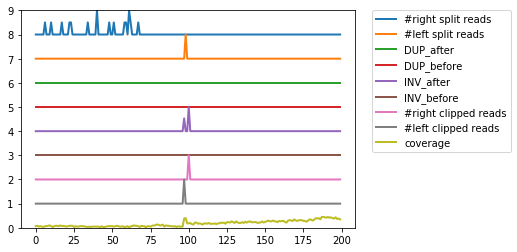

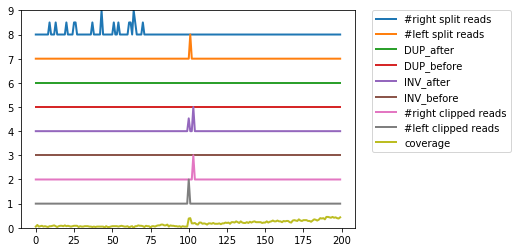

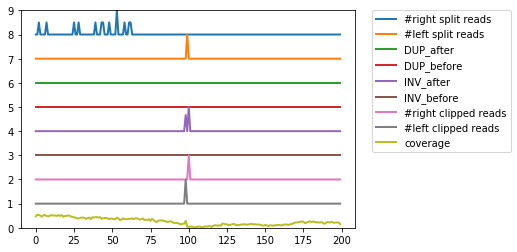

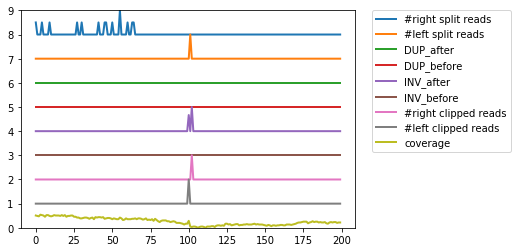

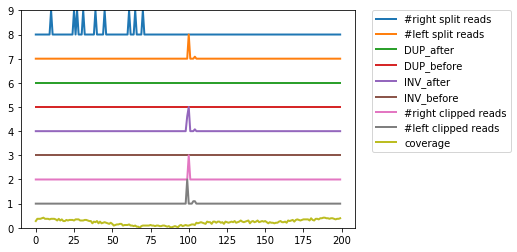

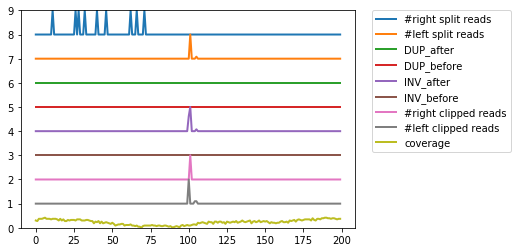

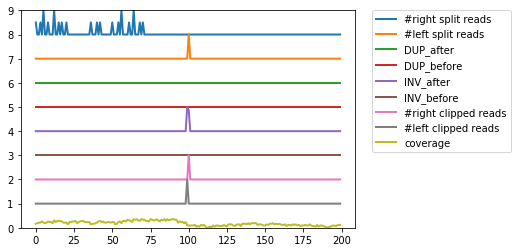

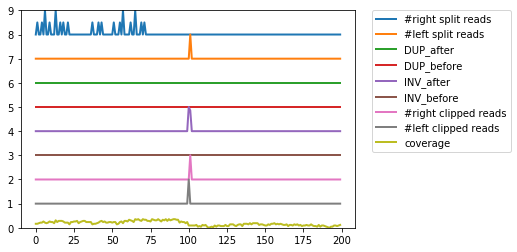

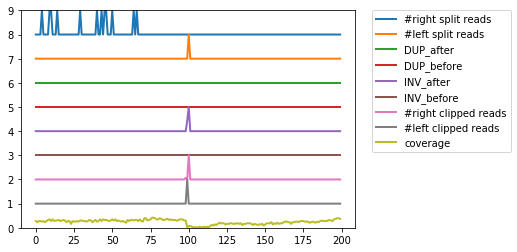

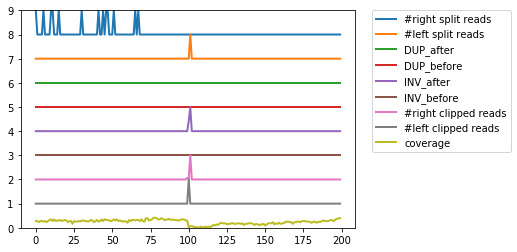

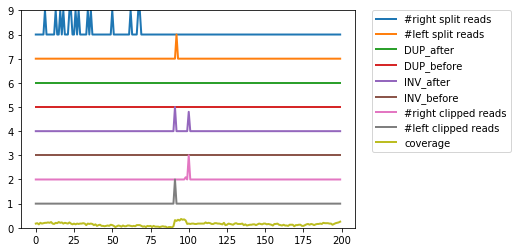

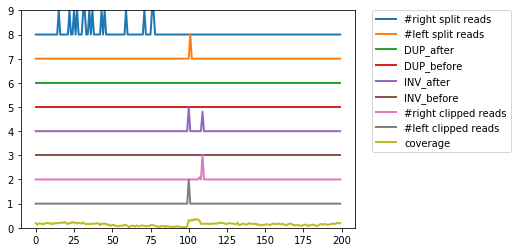

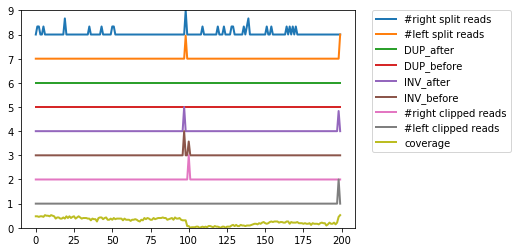

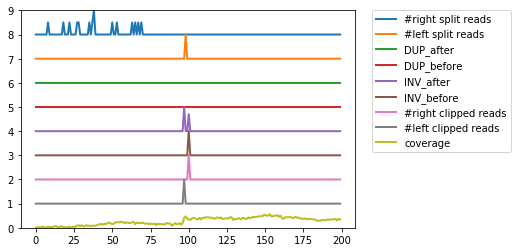

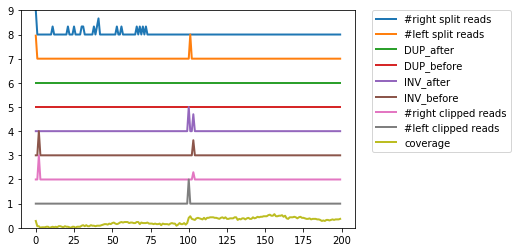

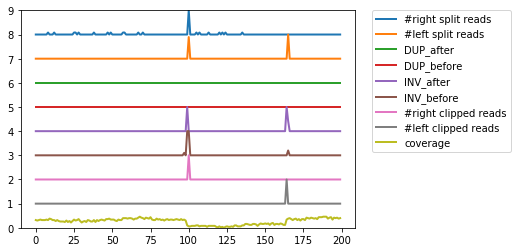

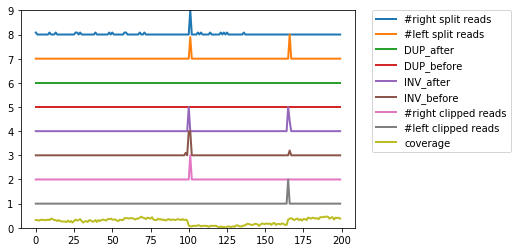

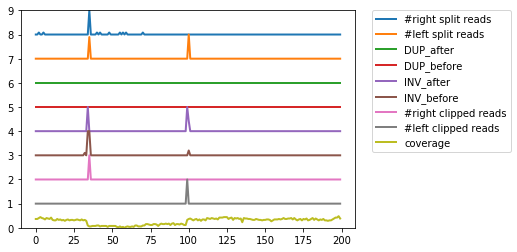

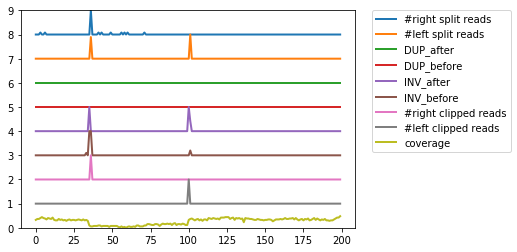

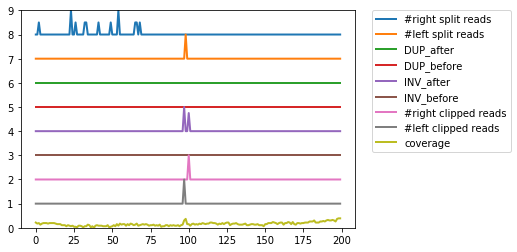

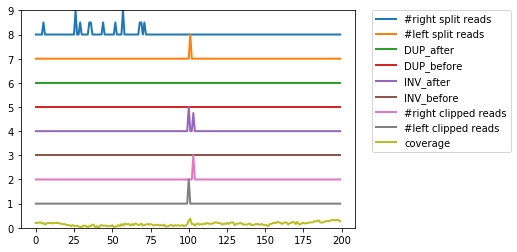

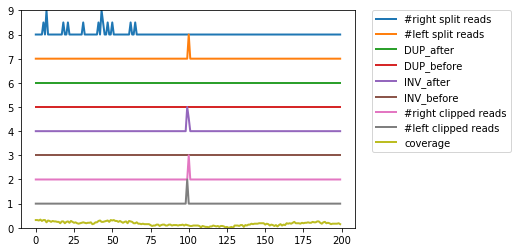

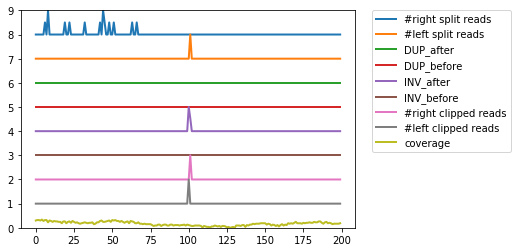

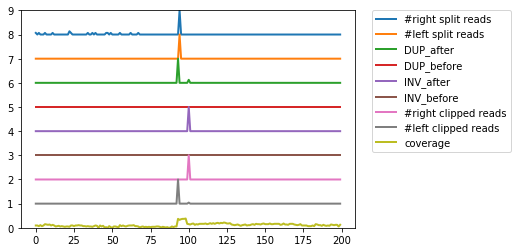

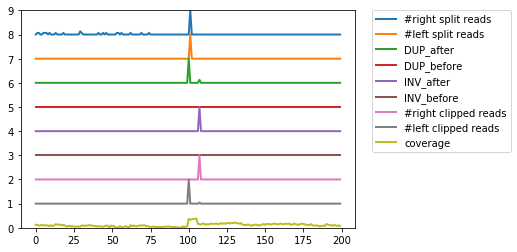

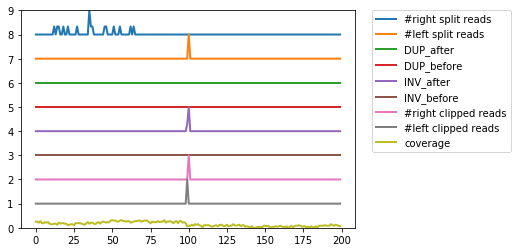

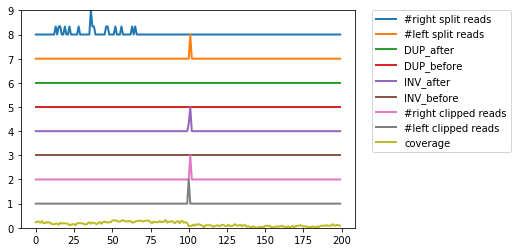

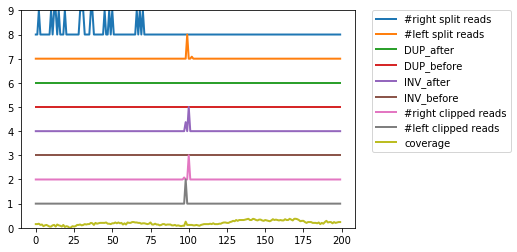

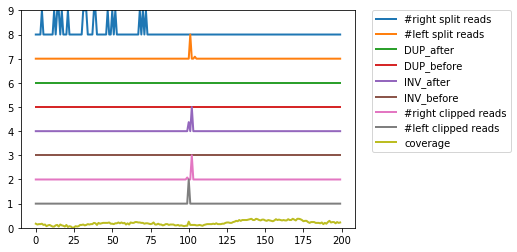

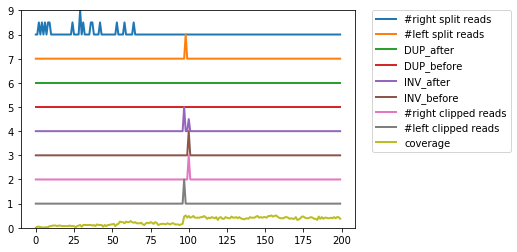

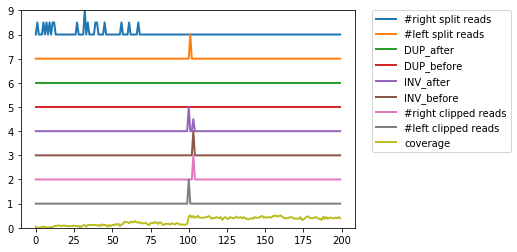

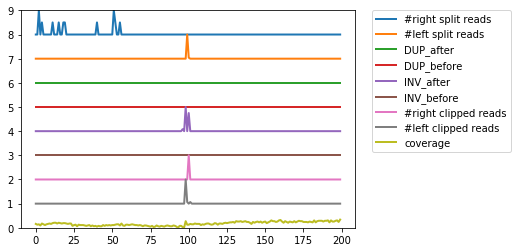

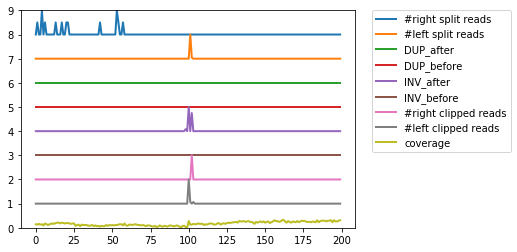

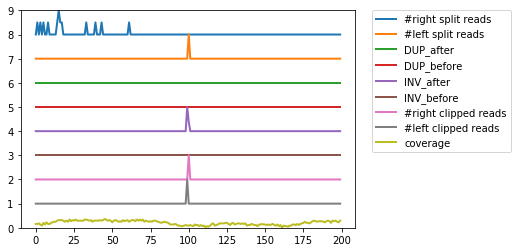

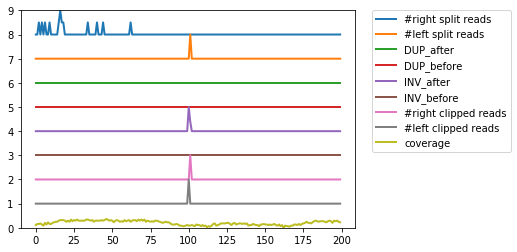

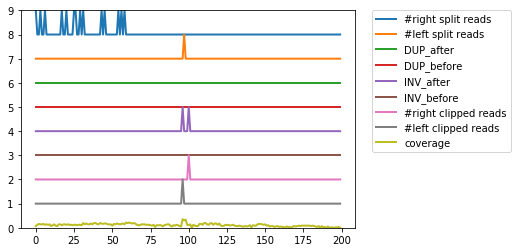

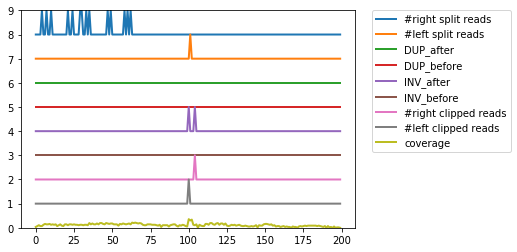

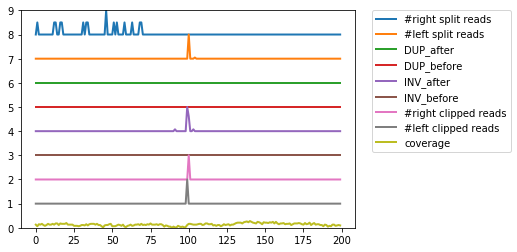

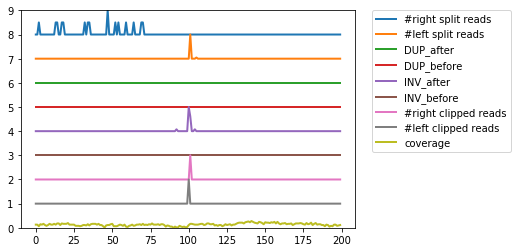

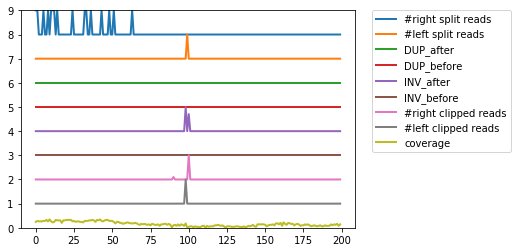

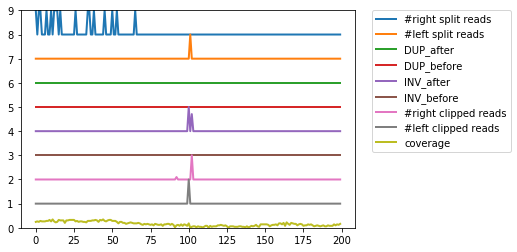

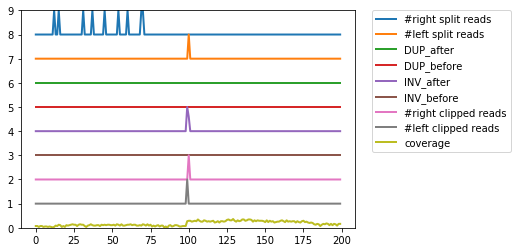

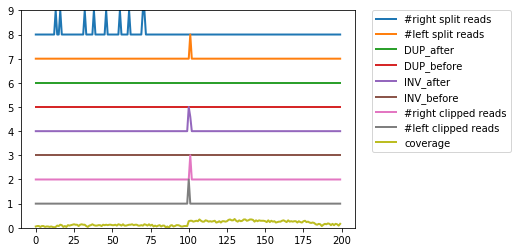

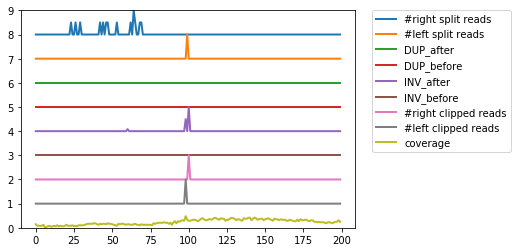

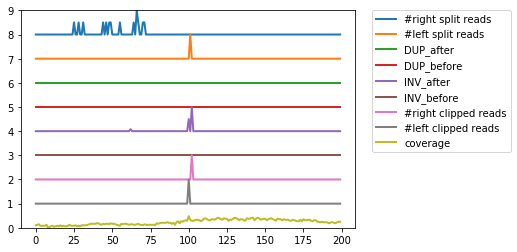

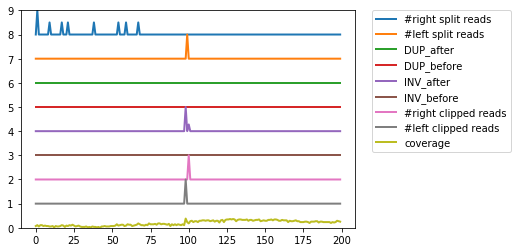

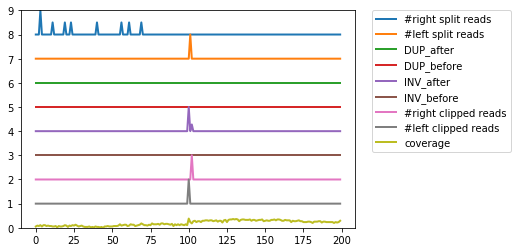

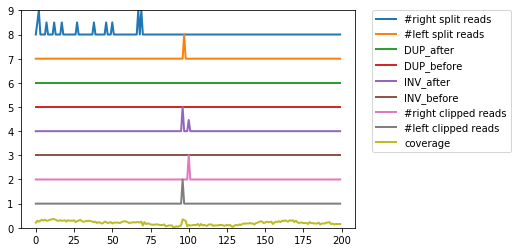

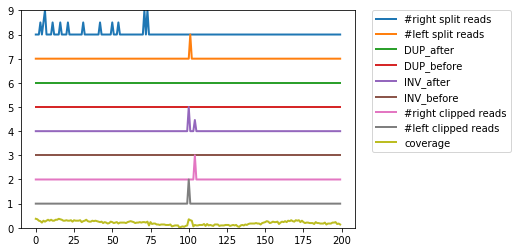

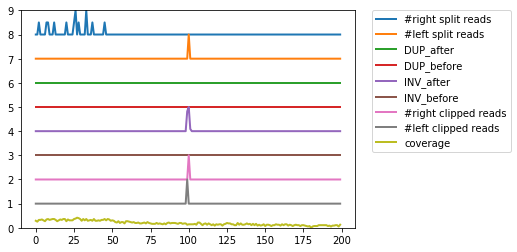

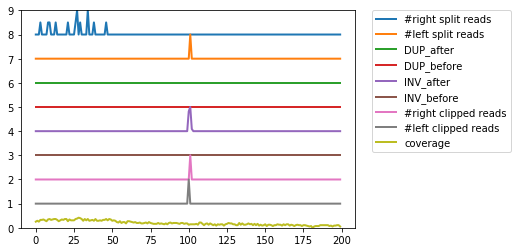

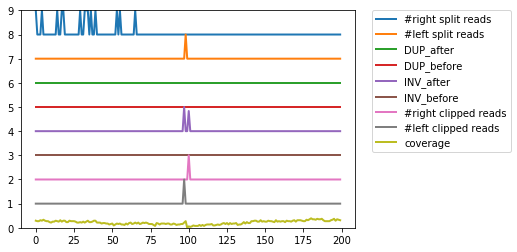

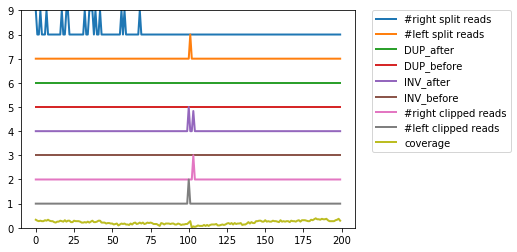

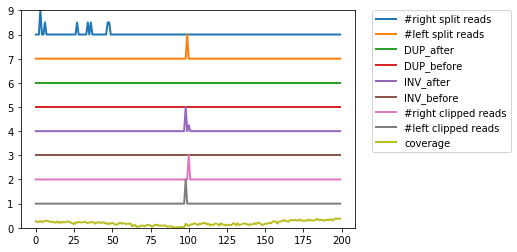

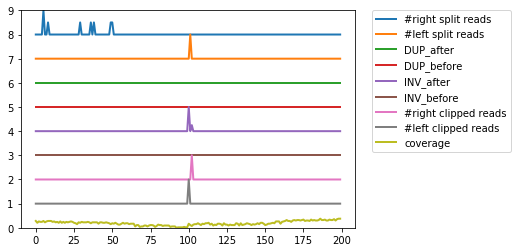

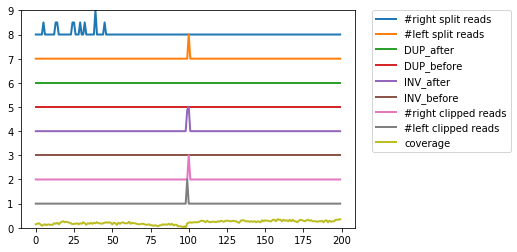

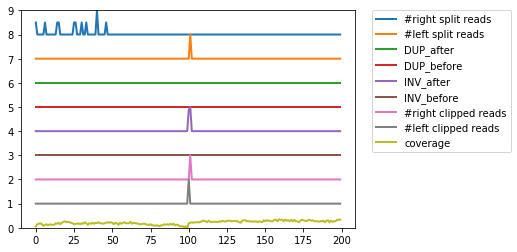

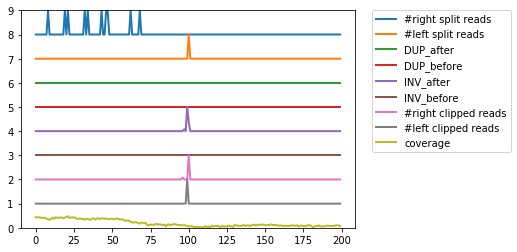

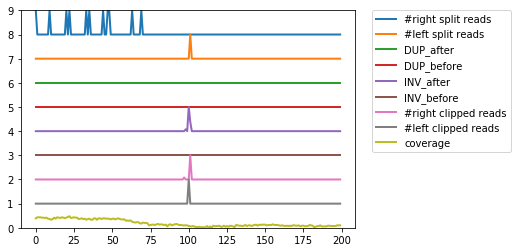

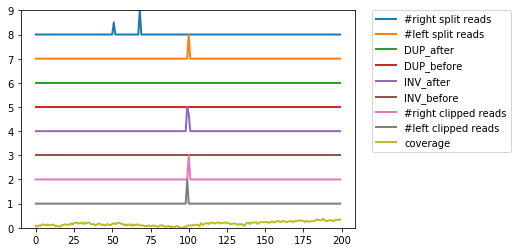

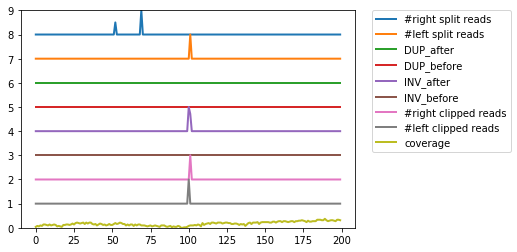

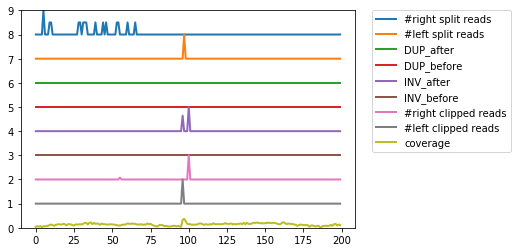

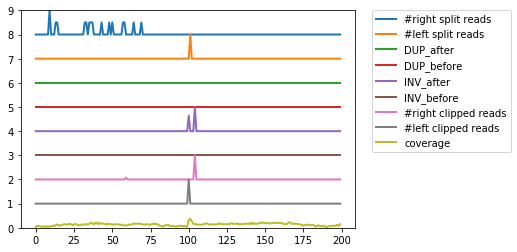

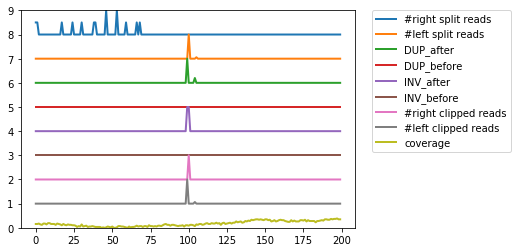

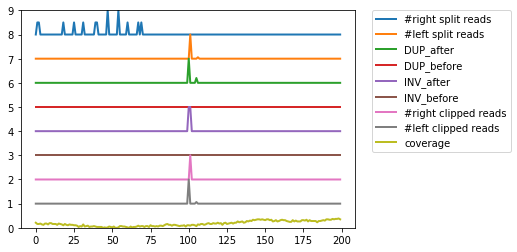

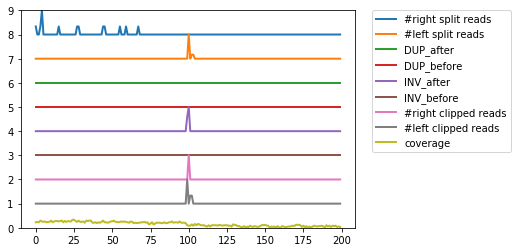

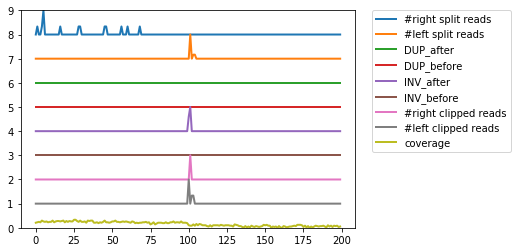

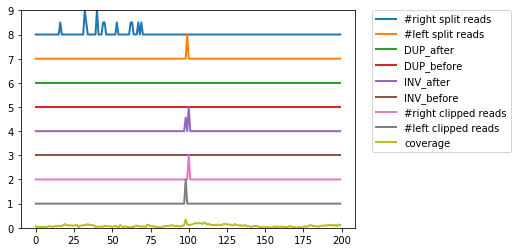

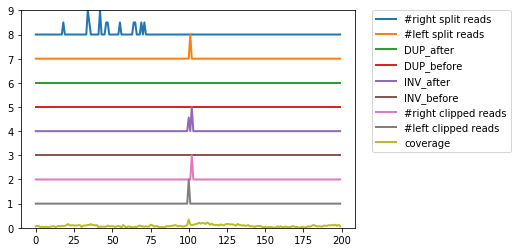

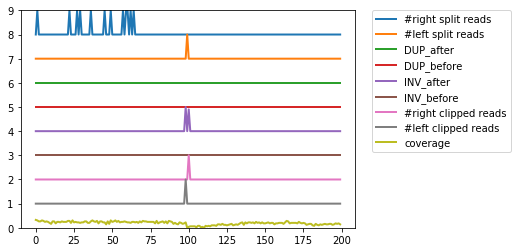

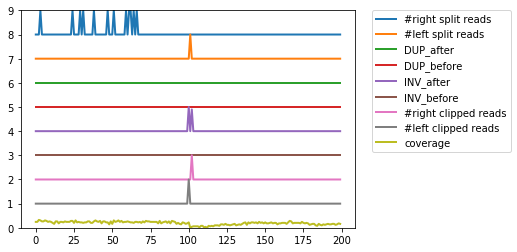

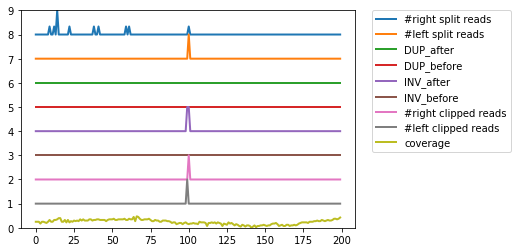

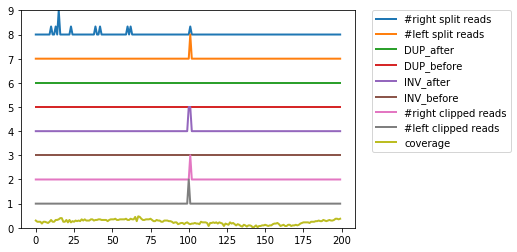

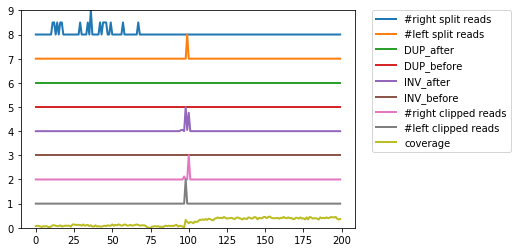

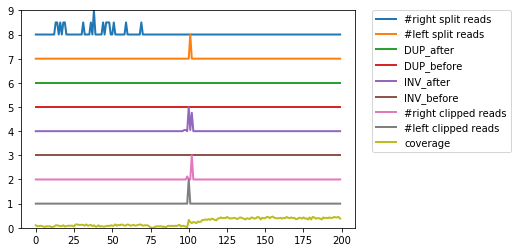

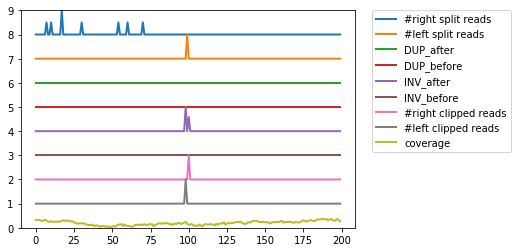

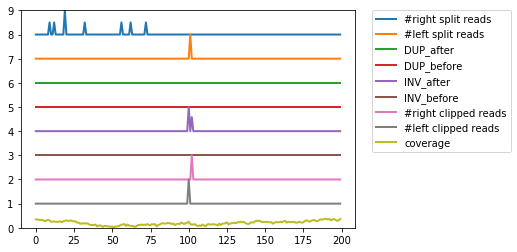

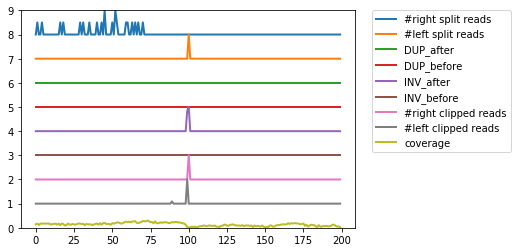

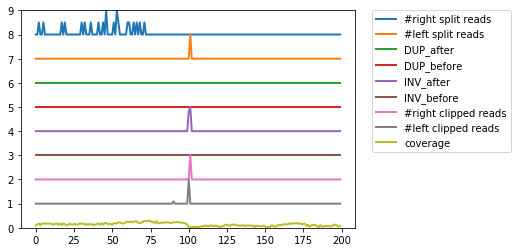

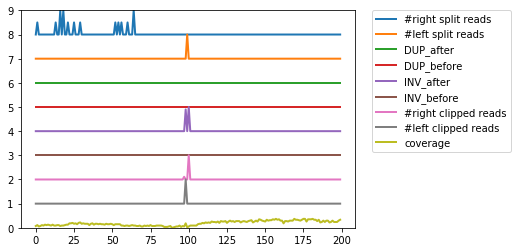

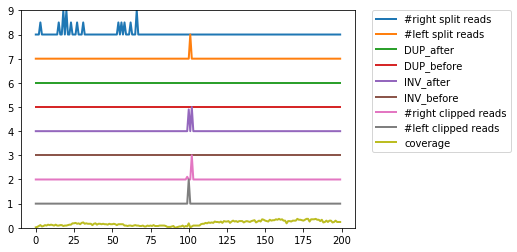

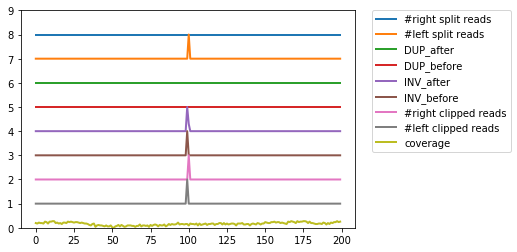

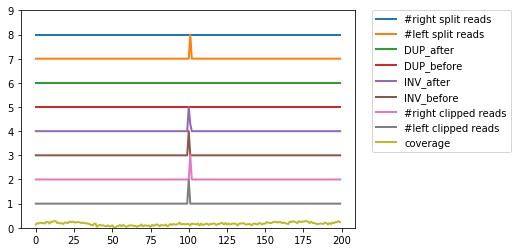

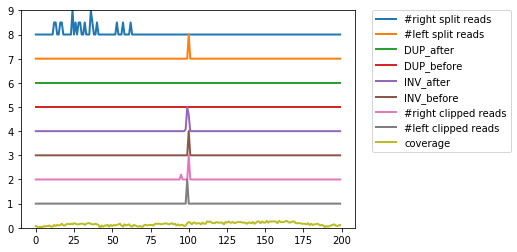

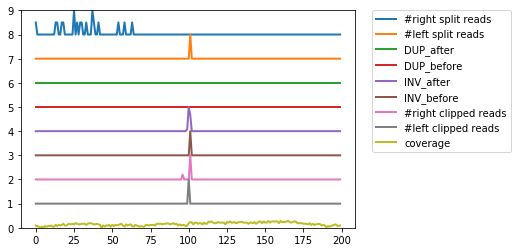

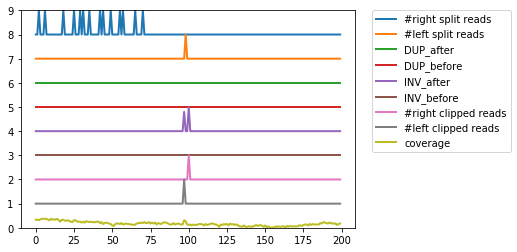

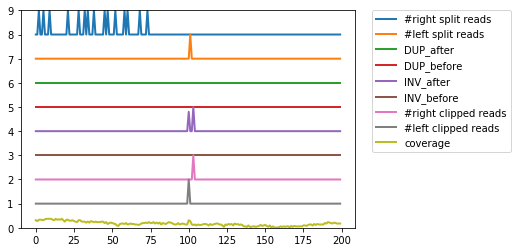

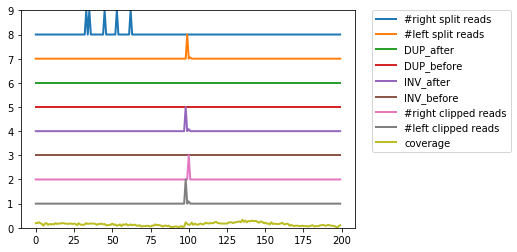

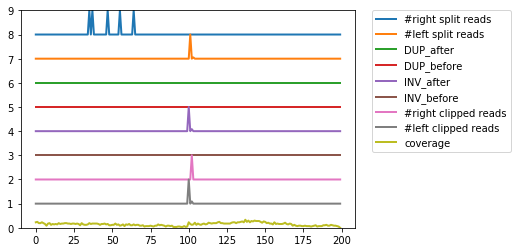

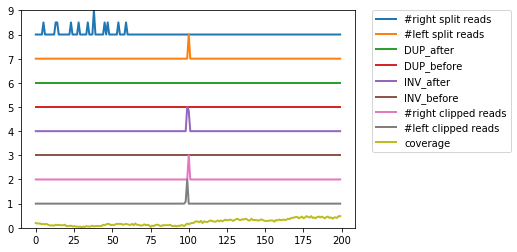

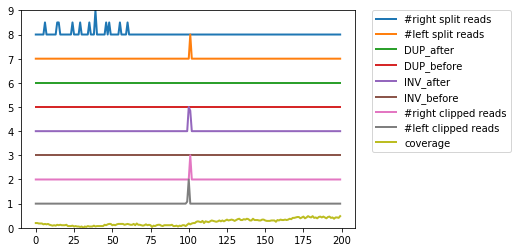

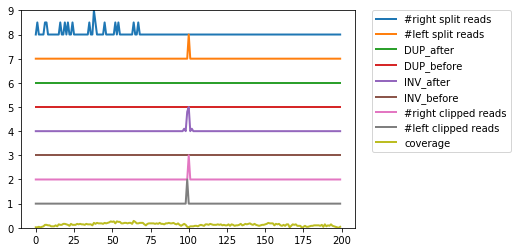

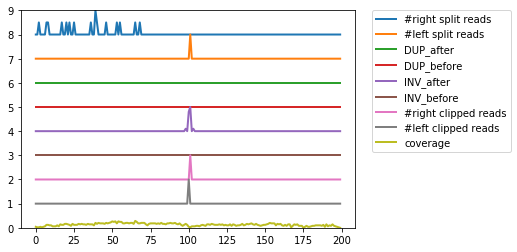

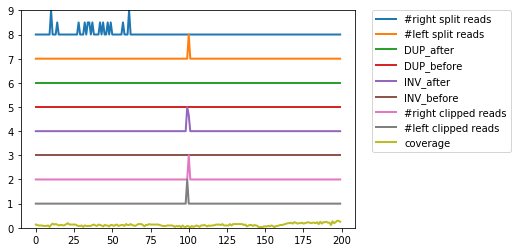

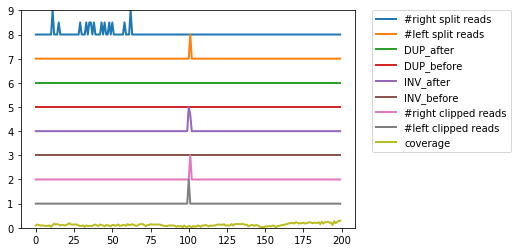

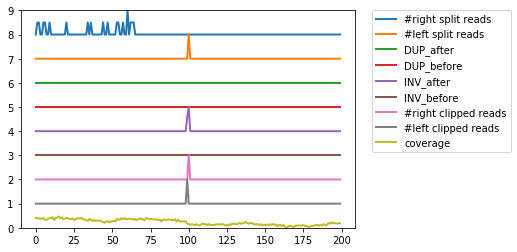

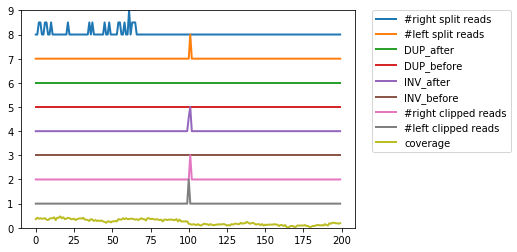

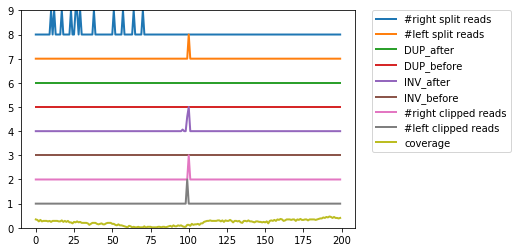

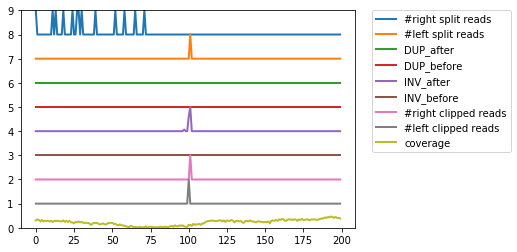

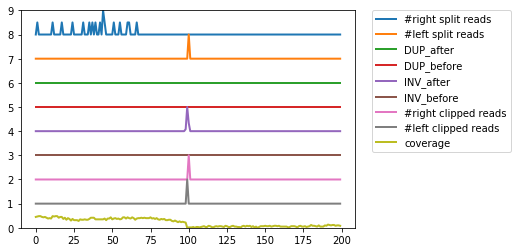

In [7]:
#idx = np.where(labels=="noSV")
#idx = np.where(labels=="noSV")
idx = np.where(labels==svtype+"_start")
#idx = np.where(labels==svtype+"_end")

print(idx[0][0])

# start_window = 3990
plot_channels(idx[0][0], 100)

In [ ]:
import pickle
# dico = pickle.load(open("/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/NA12878/MultiLabelData/labels.pickle", "rb"))
# labels = dataset = dico["Mills2011_nanosv"]

dico = pickle.load(open("/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/PATIENT1/MultiLabelData/labels.pickle", "rb"))
print(dico.keys())
labels = dataset = dico["nanosv_manta"]

window_size = 200

In [ ]:
dico = []

In [ ]:
#datapath = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/NA12878' 
datapath = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/PATIENT1/'

germline_1_datapath = datapath + '/ChannelData/'
ger_1_labels_datapath = datapath + '/LabelData/'

G1_data_SV = np.empty([0, 27, window_size])
G1_labels_SV =[]
G1_data_noSV = np.empty([0, 27, window_size])
G1_labels_noSV =[]

for i in range(1,23,1):
        print('Loading Chr'+str(i))
        data_file = germline_1_datapath + str(i) +'_channel_maker_real_germline.npy.gz'
        with gzip.GzipFile(data_file, "rb") as f:
            G1_data_new = np.load(f)
        f.close()
    
        #G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy/' +str(i) +'_label_ci_full_overlap.npy') 
        G1_labels_new = np.array(labels[str(i)])
        print(G1_labels_new[0])
        G1_data_new = G1_data_new[np.where(G1_labels_new != 'UK')]
        G1_labels_new = G1_labels_new[np.where(G1_labels_new != 'UK')]
        G1_data_SV_new  = G1_data_new[np.where(G1_labels_new != 'noSV')]
        G1_labels_SV_new  = G1_labels_new[np.where(G1_labels_new != 'noSV')]
        n_windows_sv = G1_data_SV_new.shape[0]
        G1_data_noSV_new  = G1_data_new[np.where(G1_labels_new == 'noSV')]
        G1_labels_noSV_new  = G1_labels_new[np.where(G1_labels_new == 'noSV')]
        G1_data_noSV_new =  G1_data_noSV_new[0:n_windows_sv]
        G1_labels_noSV_new =  G1_labels_noSV_new[0:n_windows_sv]
        print(str(i) + ':' + str(G1_data_SV_new.shape))
        print(G1_labels_SV_new[0])
        G1_data_SV = np.concatenate((G1_data_SV, G1_data_SV_new))
        G1_labels_SV = np.concatenate((G1_labels_SV, G1_labels_SV_new))
        G1_data_noSV = np.concatenate((G1_data_noSV, G1_data_noSV_new))
        G1_labels_noSV = np.concatenate((G1_labels_noSV, G1_labels_noSV_new))

### Find  the indexes that split the categories

In [54]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [55]:
#find_splitting_indices(G1_labels)

In [56]:
#G1_labels_SV = ['DEL'] * G1_labels_SV.shape[0]

In [57]:
G1_data_SV  = data[np.where(labels != 'noSV')]
G1_data_noSV  = data[np.where(labels == 'noSV')]

G1_labels_SV = labels[np.where(labels != 'noSV')]
G1_labels_noSV = labels[np.where(labels == 'noSV')]

In [58]:
sv=G1_data_SV.shape[0]

In [59]:
sv

38910

In [60]:
int(sv/2)

19455

In [61]:
G1_data_noSV  = G1_data_noSV[0:int(sv/2)] 

In [62]:
G1_labels_noSV  = G1_labels_noSV[0:int(sv/2)] 

In [63]:
SV_train = 1600
noSV_train = 800
SV_val = 350
noSV_val = 175

In [64]:
X_train = np.concatenate((G1_data_SV[0:SV_train], G1_data_noSV[0:noSV_train ]))
X_val = np.concatenate((G1_data_SV[SV_train:SV_train+SV_val], G1_data_noSV[noSV_train:noSV_train +noSV_val ]))
X_test = np.concatenate((G1_data_SV[SV_train+SV_val:], G1_data_noSV[noSV_train +noSV_val:]))

In [65]:
y_train = np.concatenate((G1_labels_SV[0:SV_train], G1_labels_noSV[0:noSV_train ]))
y_val = np.concatenate((G1_labels_SV[SV_train:SV_train+SV_val], G1_labels_noSV[noSV_train:noSV_train +noSV_val ]))
y_test = np.concatenate((G1_labels_SV[SV_train+SV_val:], G1_labels_noSV[noSV_train +noSV_val:]))

### Number of training, validation and test windows

In [66]:
X_train.shape

(2400, 35, 200)

In [67]:
X_val.shape

(525, 35, 200)

In [68]:
X_test.shape

(55440, 35, 200)

In [69]:
y_test.shape

(55440,)

In [70]:
number_channels = X_train.shape[1]
number_channels

35

## Normalize data using the reads coverage as parameter and remove uninteresting channels for deletions

In [ ]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


In [ ]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
# normalize(X_train)
# normalize(X_val)
# normalize(X_test)

In [ ]:
def eliminate_noise_chanels(X):
    return np.delete(X, [4-1,5-1,6-1,7-1,8-1,9-1,10-1,12-1,13-1,15-1,16-1, 17-1,18-1,19-1,23-1,24-1,26-1,27-1], axis=1)
    

In [ ]:
def eliminate_distance_chanels(X):
    return np.delete(X, [3,4,7,8], axis=1)

In [ ]:
# X_train = eliminate_noise_chanels(X_train)
# X_val = eliminate_noise_chanels(X_val)
# X_test = eliminate_noise_chanels(X_test)

In [ ]:
# X_train = eliminate_distance_chanels(X_train)
# X_val = eliminate_distance_chanels(X_val)
# X_test = eliminate_distance_chanels(X_test)

In [ ]:
X_train.shape

In [ ]:
number_channels = X_train.shape[1]
number_channels

## Differentiate the time series for a zero mean

In [ ]:
def differentiate(X):
    for i in range(0, X.shape[0]):        
        for j in range(0, X.shape[1]):
            for k in range(0, X.shape[2]-1):
                X[i][j][k] = X[i][j][k+1] - X[i][j][k]
    return X[:,:,:-1]        

In [ ]:
# X_train = differentiate(X_train)

In [ ]:
# X_val = differentiate(X_val)
# X_test = differentiate(X_test)

## Plots several  windows

In [ ]:
n_windows = 100
label = ["None"] * number_channels

In [ ]:
label[0] = "germline:coverage"
label[1] = "germline:#left clipped reads"
label[2] = "germline:#right clipped reads"
label[3] = "germline:#split reads right split"
label[4] = "germline:#split reads left split"

In [ ]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 1):
        if y_test[i] == labels[predicted[i]]:
            continue
        #print(y_train[i], 'id:', i)
        print('id:', i)
        print('Nanopore:', y_test[i], '. DeepSV:', labels[predicted[i]])
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_test[i][j]]  
            plt.ylim([150,450])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_test[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z,  label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

In [ ]:
start_window = 0
n_windows = 573
plot_channels(start_window, n_windows)

In [ ]:
n_windows = 50
start_window = 500
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [71]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

35


## Prepare the labels in McFly format

In [72]:
#mapclasses = {'DEL_start': 1, 'DEL_end': 0,  'noSV': 2}
mapclasses = {svtype+'_start': 1, svtype+'_end': 0,  'noSV': 2}
print(mapclasses)

{'INV_start': 1, 'INV_end': 0, 'noSV': 2}


In [73]:
y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

In [74]:
y_test_binary

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [75]:
y_val_binary

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [76]:
X_train.shape

(2400, 200, 35)

##  Generate and train neural networks 

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
#sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [78]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 3, 
                                  cnn_max_filters = 3, 
                                  cnn_min_fc_nodes=2, 
                                  cnn_max_fc_nodes=2,
                                  low_lr=1.73, high_lr=1.73,
                                  kernel_size = 11)

In [79]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=2,
                                  cnn_max_layers=2,
                                  cnn_min_filters = 4, 
                                  cnn_max_filters = 4, 
                                  cnn_min_fc_nodes=6, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=2, high_lr=2)
                                  #kernel_size = 7)

CPU times: user 509 ms, sys: 10.4 ms, total: 519 ms
Wall time: 518 ms


In [80]:
import inspect
#print(inspect.getsource(modelgen.generate_models))

In [81]:
print(inspect.getfile(modelgen.generate_models))

/hpc/cog_bioinf/ridder/users/lsantuari/Software/miniconda2/envs/mcfly_new/lib/python3.6/site-packages/mcfly/modelgen.py


In [82]:
%%time
i=0
for model, params, model_types in models:
    print('model ' + str(i))
    i=i+1
    print(params)
    model.summary()

model 0
{'learning_rate': 0.01, 'regularization_rate': 0.0009018207890398691, 'filters': array([4, 4]), 'fc_hidden_nodes': 6}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 200, 35)           140       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 4)            424       
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 4)            16        
_________________________________________________________________
activation_5 (Activation)    (None, 200, 4)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 4)            52        
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 4)            16        
________________

In [83]:
train_set_size = X_train.shape[0]
train_set_size

2400

In [84]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                 subset_size=train_set_size,
                                                                                 verbose=True)

Training model 0 CNN
Train on 2400 samples, validate on 525 samples
Epoch 1/1
2400/2400 [==============================] - 3s 1ms/step - loss: 0.3170 - acc: 0.9596 - val_loss: 0.1298 - val_acc: 0.9905
CPU times: user 5.27 s, sys: 359 ms, total: 5.63 s
Wall time: 4.15 s


## Save the best model

In [85]:
best_model_index = np.argmax(val_accuracies)
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'learning_rate': 0.01, 'regularization_rate': 0.0009018207890398691, 'filters': array([4, 4]), 'fc_hidden_nodes': 6}


In [86]:
from keras.models import load_model

#model_path = os.path.join('/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/NA12878/ModelData', 'Gtcg_13_9')
model_path = os.path.join('/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/260918/Chr17_'+svtype, 'Chr17_'+svtype)

best_model.save(model_path)

## Train the best model on the full dataset

In [87]:
#We make a copy of the model, to start training from fresh
nr_epochs = 1
datasize = train_set_size # Change in `X_train.shape[0]` if training complete data set
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              epochs=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 2400 samples, validate on 525 samples
Epoch 1/1
2400/2400 [==============================] - 1s 404us/step - loss: 0.0871 - acc: 0.9983 - val_loss: 0.0689 - val_acc: 0.9924


## Reload the trained model

In [88]:
import os
from keras.models import load_model
#model_path = os.path.join('/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/060818/TestData_060818/NA12878/ModelData',  'Gtcg_13_9')
model_path = os.path.join('/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/260918/Chr17_'+svtype, 'Chr17_'+svtype)

model_reloaded = load_model(model_path)

## Inspect model predictions on test data

In [89]:

model = model_reloaded 
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=100, verbose=True)

55440/55440 [==============================] - 3s 55us/step


## Columns are predicted labels by DeepSV, rows are nanopore labels

In [90]:
#mapclasses = {'DEL_end': 0, 'DEL_start': 1, 'noSV': 2}
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('INV_end', 0), ('INV_start', 1), ('noSV', 2)]

In [91]:
labels = [i[0] for i in dict_sorted]

In [92]:
import pandas as pd
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

,INV_end,INV_start,noSV
INV_end,48,19296,119
INV_start,12,17345,140
noSV,0,80,18400


## Test best current model on testset

### Overall accuracy on the test set:

In [51]:
%%time
score_test = model.evaluate(X_test, y_test_binary, verbose=True)
print('Test loss and accuracy of best model: ' + str(score_test))

55440/55440 [==============================] - 6s 104us/step
Test loss and accuracy of best model: [0.7642117928331893, 0.638023088023088]
CPU times: user 10.3 s, sys: 1.22 s, total: 11.5 s
Wall time: 5.74 s


In [ ]:
df_conf = pd.DataFrame()

for i in np.linspace(1.0 / len(labels), 1, num=50, endpoint=False):

    predicted = np.argwhere(probs > i)[:, 1]
    y_index = np.argwhere(y_test_binary > i)[:, 1]

    # Rows: true, columns: predicted
    confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
    confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
    confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
    confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)

    #print('Confusion matrix:')
    #print(confusion_matrix)
    
    for l in labels:
        if l in confusion_matrix.index:
            # print(confusion_matrix.loc[l,:])
            # print(confusion_matrix.loc[:,l])

            # label_correct = confusion_matrix.loc[l, l]
            label_precision = np.around(confusion_matrix.loc[l, l] / sum(confusion_matrix.loc[:, l]) * 100)
            label_recall = np.around(confusion_matrix.loc[l, l] / sum(confusion_matrix.loc[l, :]) * 100)
            label_F1 = 2 * (label_precision * label_recall) / (label_precision + label_recall)

            # print(f'Iter:{i} {l} -> Precision:{label_precision}%, Recall:{label_recall}%, F1:{label_F1}')

            df_intres = pd.DataFrame(
                {'iteration': [i], 'label': [l],
                 'precision': [label_precision], 'recall': [label_recall], 'F1': [label_F1]})
            df_conf = df_conf.append(df_intres)
            
print(df_conf)

In [ ]:
# df_conf[df_conf['label']=='DEL_start']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_conf[df_conf['label']=='DEL_start']['precision'])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import pandas as pd
print(pd.__version__)